DIRECTING CUSTOMERS TO SUBSCRIPTION PRODUCTS THROUGH APP BEHAVIOUR ANALYSIS

import pandas as pd
from pandas import Series,DataFrameMany companies have mobile presence. These companies like YouTube, Pandora etc give theor customers free services or products in an attempt to transition their customers to paid membership. The product can be anything but it must have both a free and a paid version. The goal of the project will be to convert these free users into paid members.

In [1]:
import pandas as pd
from pandas import Series,DataFrame

app_data = pd.read_csv('new_appdata10.csv')

In [2]:
app_data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaN,...,0,0,0,0,0,9,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaN,...,0,0,0,0,0,7,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaN,...,0,0,0,0,0,2,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,8,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,12,0,2,0,1


The first column 'user' is the user identifier. In some cases it might be email id but in this case it is a numerical id that represents a particular user. 

The second column 'first_open' specifies the first day and time when the user opened the app.

'Day of the week' represents the day of the week with 0 meaning Sunday and 6 meaning Saturday.

'hour' means the hour of the day when they first opened the app.

'age' defines the age of the user.

'screen list' is perhaps the most important feature in this case study. It describes every single screen that the user has used in those 24 hours.

'num_screens" is the number of screens that appear in the 'screen list' column.

'mini_game' The app has  a mini_game which is free. If the player plays a mini-game in first 24 hours, he gets a one(1). If not, he gets a zero(0).

'like' : If the user likes any feature, he gets a 1, if not he gets 0

'used pemium feature' : If the user has used a premium feature, he gets a 1, if not 0

enrolled: If the user uses the product after the free trail, he gets a 1, otherwise a 0

enrolled date : It gives the date of the enrollment.

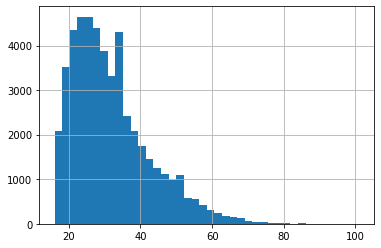

In [23]:
app_data['age'].hist(bins=40)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [24]:
app_data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,difference,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,31074.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,190.791659,...,0.014220,0.013340,0.013400,0.008200,0.007580,8.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,621.887155,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,5434.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,37.000000,10.000000,5.00000,3.000000,3.000000


The first step which we will follow is converting hour column which is in date format into string format.

In [37]:
app_data['hour'] = app_data.hour.str.slice(1,3).astype(int)

AttributeError: Can only use .str accessor with string values!

In [38]:
app_data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaN,...,0,0,0,0,0,9,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaN,...,0,0,0,0,0,7,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaN,...,0,0,0,0,0,2,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,8,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,12,0,2,0,1


In [43]:
app_data2 = app_data.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])

KeyError: "['screen_list'] not found in axis"

In [21]:
app_data2.head()

NameError: name 'app_data2' is not defined

In [ ]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
#Since we want to plot every feature in one single plot, we re going to iterate every feature
for i in range(1, app_data2.shape[1]+1):
    #This will iterate every feature.Shape gives the dimensions of the dataframe and he first item gives the number of columns
    #and since python does not include all the columns we are adding 1 to it. 
    plt.subplot(3,3,i)
    #Here in subplot, we are going to tell python number of images in the plot.'i' is given to tell what we are 
    #working on the moment
    f = plt.gca()
    #gca() command cleans up everything
    f.set_title(app_data2.columns.values[i - 1])
    #It will title each feature
    
    vals = np.size(app_data2.iloc[:, i - 1].unique())
    #It will tell python how many bins will be in each feature. [:, i-1 ] will query the entire column
    
    plt.hist(app_data2.iloc[:, i - 1], bins = vals, color= '#3F5D7D')

Day of the week seems to have a uniform distribution. There is no particular day of the week which seems to favour to users.

Hour historgram shows that during morning and day, there is a big drop in usage of the game.

The Age distribution has a right skewed normal distribution. It shows that between 20-30, it is maximum.

minigame, used_premium_feature, liked: The initial bar shows 0 meaning most of the users have not played the game and the second bar signifies 1 showing how amany users have played the game. The histogram in all the three cases shows 0 for all the three cases.

Co-relation Plot
This plot is used to show the corelation between the independent features and the response variable. 

In [ ]:
app_data2.corrwith(app_data.enrolled).plot.bar(figsize = (20,10),
                                              title = 'Correlation with the response Variable',
                                              fontsize = 15,
                                              rot= 45)
                                              

'hour' and 'age' are negatively correlated to the response variable meaning more the age, less likely will be the enrollment. numscreens and minigame are positively correlated meaning if you play the minigame, you will more likely get enrolled. Interestingly 'used_premium_feature' is negatively correlated. 

CORRELATION MATRIX

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [ ]:
sn.set(style="white", font_scale=2)

corr = app_data2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

cmap = sn.diverging_palette(220,10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself

Feature Engnineering of the Response Variable

In [ ]:
#The main part of the machine learning model is to fine tuning the response variable. This is important because often we 
#to set a limit for the user to convert to a paid member. This is because we want to have a way to validate the model in 
#future datasets. For example if we have just one week to check if the model was accurate in predicting after install,
#we cannot wait until the end of time to seee if the model was accurate. That is why we need to have a particular data range
#limit on our response variable.

#To understand what time is optimal, we need to find the difference between first open and the enrollment date.

app_data.dtypes

#what we want is to convert object into datetime objects

In [ ]:
app_data["first_open"] = [parser.parse(row_data) for row_data in app_data["first_open"]]
app_data["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in app_data["enrolled_date"] ]




In [ ]:
app_data.dtypes

In [ ]:
app_data["difference"] = (app_data.enrolled_date - app_data.first_open).astype('timedelta64[h]')

plt.hist(app_data["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')

In [ ]:
plt.hist(app_data["difference"].dropna(), color = '#3F5D7D', range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')

In [ ]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [ ]:
top_screens

In [ ]:
#The screenlist is comma separated and for making it usabke for model, it has to be made in that format. One method is to 
#make it in a column format. But there are so namy screens, the columns list will not be abke to show all. 
#we are going to create columns for popular screens and another column for other unpopular screens.

# Mapping Screens to Fields
app_data["screen_list"] = app_data.screen_list.astype(str) + ','
#We are going to add comma to the screenlist column. There will be always one comma less than the number of screens


#To create a column for each top screens, we are going to use a for loop. We are going to convert it into str and and the 
#contains command will return boolean and return an integer.
for sc in top_screens:
    app_data[sc] = app_data.screen_list.str.contains(sc).astype(int)
    #It will replace the column with an empty string
    app_data['screen_list'] = app_data.screen_list.str.replace(sc+",", "")

app_data['Other'] = app_data.screen_list.str.count(",")
#It will count number of other screenlist columns by counting the comma
app_data = app_data.drop(columns=['screen_list'])
#drop the column screenlist

In [ ]:
# Funnels
#Funnels are a group of screens that belong to a same set. We dont want correlated screens because that causes problem with 
#model
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
app_data["SavingCount"] = app_data[savings_screens].sum(axis=1)
app_data = app_data.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
app_data["CMCount"] = app_data[cm_screens].sum(axis=1)
app_data = app_data.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
app_data["CCCount"] = app_data[cc_screens].sum(axis=1)
app_data = app_data.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
app_data["LoansCount"] = app_data[loan_screens].sum(axis=1)
app_data = app_data.drop(columns=loan_screens)


In [ ]:
app_data.describe()

In [ ]:
app_data.columns

In [ ]:
app_data.to_csv('new_appdata10.csv', index = False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

dataset = pd.read_csv('new_appdata10.csv')


#### Data Pre-Processing ####

# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

## Balancing the Training Set
#import random
#y_train.value_counts()
#
#pos_index = y_train[y_train.values == 1].index
#neg_index = y_train[y_train.values == 0].index
#
#if len(pos_index) > len(neg_index):
#    higher = pos_index
#    lower = neg_index
#else:
#    higher = neg_index
#    lower = pos_index
#
#random.seed(0)
#higher = np.random.choice(higher, size=len(lower))
#lower = np.asarray(lower)
#new_indexes = np.concatenate((lower, higher))
#
#X_train = X_train.loc[new_indexes,]
#y_train = y_train[new_indexes]


# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


#### Model Tuning ####

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_


#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)




In [ ]:
app_data